# Midterm Election Regression Project

The goal is to use regression techniques to compare how inflation, job growth, voter turnout, and presidential approval ratings might correlate to or influence the outcome of a midterm election, in how many senate and house seats flipped to another policial party. We hope that by the end of the project, we can know which factors have more of an effect on the outcome of a midterm, and can use the model to predict how a new midterm will fare.

# Data Processing Pipeline

Because we are getting the data from different datasets, we needed to clean each dataset individually to get the information we wanted before we could add it to one central dataframe to house all of the information. 

## Where the Data comes from

We can get the [inflation data](https://beta.bls.gov/dataViewer/view/timeseries/CUUR0000SA0;jsessionid=04BF074AA2F02CAFB14656118D04709A) from the Bureau of Labor Statistics. We will take the October data from a midterm year showing the % change in CPI over the past six month period. This will give us a good sense of how voters were perceiving and experiencing inflation leading up to the voting date. 



## Cleaning the Initial Data 

In [2]:
import pandas as pd

In [3]:
#Inflation Data
#import the large dataset from the inflation csv
df_inflation_big = pd.read_csv('inflation_data.csv')

#to only keep October data, identify partial strings (Months) that need to be discarded
discard = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 
          'Sep', 'Nov', 'Dec']
  
# drop rows that contain the partial strings above 
#https://www.geeksforgeeks.org/how-to-drop-rows-that-contain-a-specific-string-in-pandas/
df_infl_oct = df_inflation_big[~df_inflation_big.Label.str.contains('|'.join(discard))]

#grab every fourth year (midterm years) into new df
df_infl_midterms = df_infl_oct.iloc[::4,:]

#reset the indecies to start from 0
#https://pynative.com/pandas-reset-index/
df_infl_midterms.reset_index(drop=True, inplace=True)

#make the final dataframe of only the necessary columns (year and inflaiton percent change)
df_infl = df_infl_midterms[['Year', '6-Month % Change']].copy()
df_infl

FileNotFoundError: [Errno 2] No such file or directory: 'inflation_data.csv'

### Clean file with job growth information ###

In [4]:
# read the csv files 
df_jobs = pd.read_csv('US_jobs.csv')

# cleaned data for visualization
df_job_change = df_jobs[['Year', '% Change']]

# list of years of election
election_years = [1934, 1938, 1942, 1946, 1950, 1954, 1958, 1962, 1966, 1970, 1974, 
                  1978, 1982, 1986, 1990, 1994, 1998, 2002, 2006, 2010, 2014, 2018, 2022]

# initialize list for new data on important years
new_data = []

# filter to all the years of the election by accessing the 'year' column
df_new_job = df_job_change.loc[df_job_change['Year'].isin(election_years)]
         
#reset the indecies to start from 0 of new dataframe
df_new_job.reset_index(drop=True, inplace=True)

df_new_job

FileNotFoundError: [Errno 2] No such file or directory: 'US_jobs.csv'

### Clean the midterm election data

In [6]:
# use pandas read_csv to read in the midterm data
df_midterm = pd.read_csv('midterm-data.csv')

# create a list of all the columns we want to drop
to_drop = ['Lame Duck?','Approval Early Aug','Approval Late Aug','Approval Early Sep',
          'Approval Late Sep']

df_midterm.drop(to_drop, inplace=True, axis=1)

df_midterm.head()

,Year,President,President's party,Approval Early Oct,Approval Late Oct,House Seats to defend,Senate Seats to defend,"Seat Change, House Seats","Seat Change, Senate Seats"
0,1934,Franklin D. Roosevelt,D,--,--,313,14,9.0,9.0
1,1938,Franklin D. Roosevelt,D,--,60,334,27,-81.0,-7.0
2,1942,Franklin D. Roosevelt,D,--,--,267,25,-46.0,-9.0
3,1946,Harry S. Truman,D,--,27,244,21,-45.0,-12.0
4,1950,Harry S. Truman,D,43,41,263,21,-29.0,-6.0


#### NOTE:
We keep the october approval ratings because we plan on using the approval ratings in our prediction and feature importance analysis

## Combining the data into one dataframe

# Visualizations

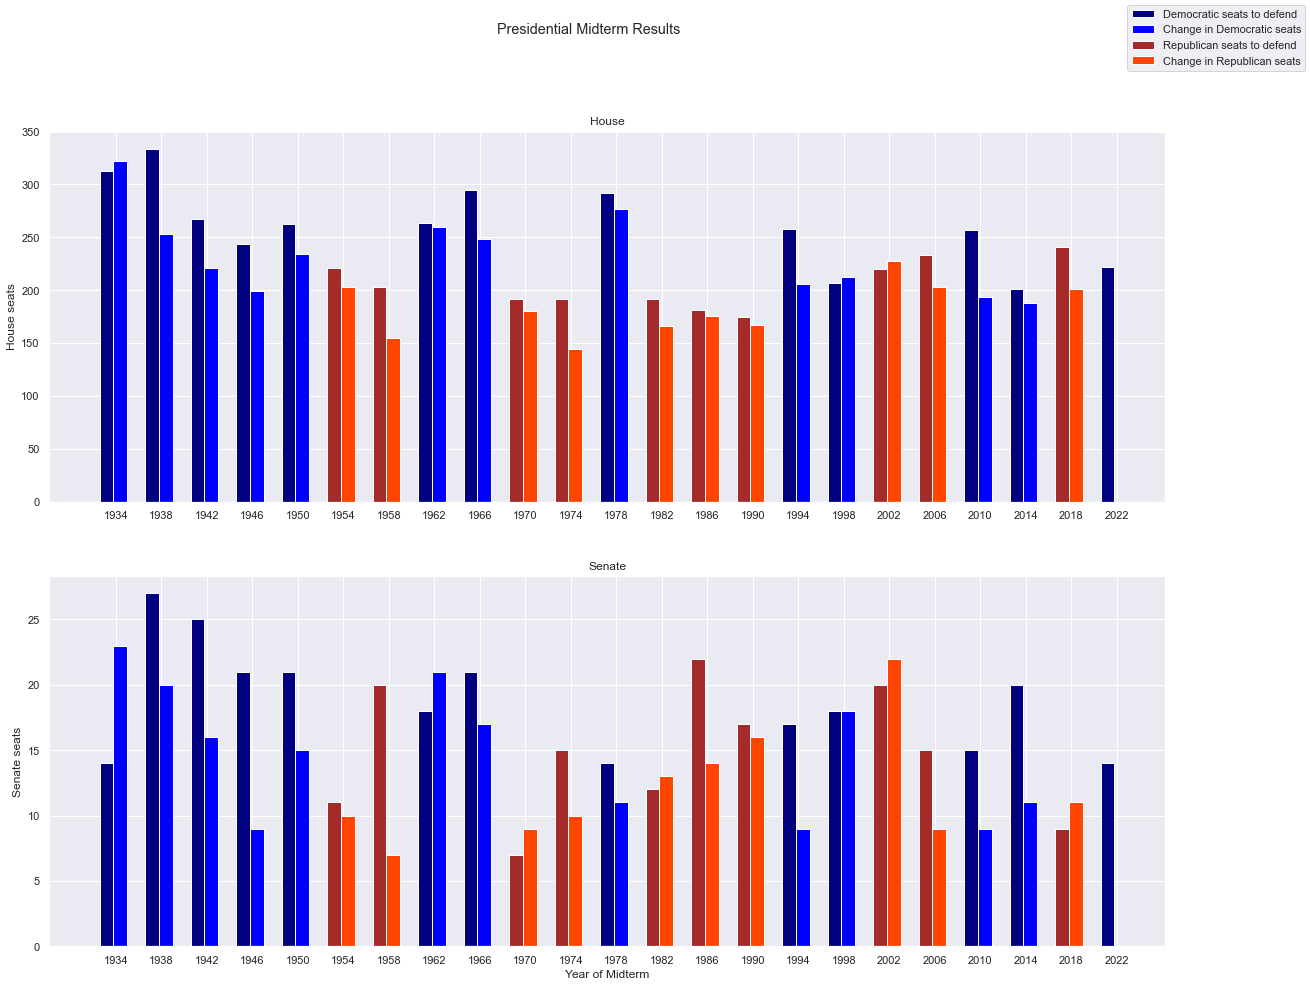

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


sns.set()

# create a subplot
fig, (ax1, ax2) = plt.subplots(2)

# to create an accurate cluster bar chart, make x the length of df_midterm
x = np.arange(len(df_midterm))
width = 0.3

plt.gcf().set_size_inches(20, 15)

# create our y values
y0 = df_midterm['House Seats to defend']
y1 = df_midterm['House Seats to defend'] + df_midterm['Seat Change, House Seats']
y2 = df_midterm['Senate Seats to defend']
y3 = df_midterm['Senate Seats to defend'] + df_midterm['Seat Change, Senate Seats']

# initialize two counters
n = 0
m = 0

# go through row and graph based on presidential party
for idx in df_midterm.index:
    
    if df_midterm["President's party"][idx] == 'R':
        n += 1 
        ax1.bar(x[idx]-0.3, y0[idx], width, color='brown', 
                label ='Republican seats to defend' if n == 1 else '')
        ax1.bar(x[idx], y1[idx], width, color='orangered', 
                label = 'Change in Republican seats' if n == 1 else '')
        ax2.bar(x[idx]-0.3, y2[idx], width, color='brown')
        ax2.bar(x[idx], y3[idx], width, color='orangered')
    
    if df_midterm["President's party"][idx] == 'D':
        m += 1
        ax1.bar(x[idx]-0.3, y0[idx], width, color='navy', 
                label ='Democratic seats to defend' if m == 1 else '')
        ax1.bar(x[idx], y1[idx], width, color='blue', 
                label = 'Change in Democratic seats' if m == 1 else '')
        ax2.bar(x[idx]-0.3, y2[idx], width, color='navy')
        ax2.bar(x[idx], y3[idx], width, color='blue')


ax1.set_xticks(x-0.1)
ax1.set_xticklabels(df_midterm['Year'])
ax2.set_xticks(x-0.1)
ax2.set_xticklabels(df_midterm['Year'])
ax1.set_title('House')
ax2.set_title('Senate')
fig.legend()

plt.suptitle('Presidential Midterm Results')
plt.xlabel("Year of Midterm")
ax1.set(ylabel = 'House seats')
ax2.set(ylabel = 'Senate seats')
plt.savefig('clean-midterm-data.png', edgecolor='black', dpi=400)
plt.show()


# Data Analysis Plan 

Our hope for this project is that we are able to perform factor importance analysis on the data we gather to see which is more important for determining the outcome of a midterm election. To do this, we think using regression models on each of the categories makes the most logical sense, because we want to see a predictions made from the data. We assume that linear regressions will work the best, but we are going to try different kinds to see what provides us the strongest output. We will compute the MSE score, and the R2 value (using SK learn), in order to help explain the correlation between values and at how accurate our regression is at predicting outcomes. 